<a href="https://colab.research.google.com/github/mariachurches/AprendizajeSupervisado/blob/main/Enunciado_C1_P2/Actividad_C1_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convocatoria 1 - Proyecto 2

### Ejercicio 1 (4 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

In [202]:
#Importamos las librerias necesarias y cargamos
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope

data = np.load("/content/dataset_1.npy")
X_data = data[:, : -1]
y_data = data[:, -1]

#### 1.a) Imputación de valores ausentes (2 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M. 

In [203]:
print("Antes de la imputación de valores ausentes había que " +  str(np.isnan(data).any(axis=1).sum()) + " filas con valores ausentes")

#Primero borramos aquellas instancias que tienen más de un elemento nan
X_data = X_data[~np.isnan(X_data).all(axis=1)]

#Después borramos los NaN restantes como nos indica el enunciado
data_discreta = X_data[:,:4]
data_continua = X_data[:,5:]

imp_media = SimpleImputer(strategy='mean') # Utilizamos la estrategia de la media
imp_moda = SimpleImputer(strategy='most_frequent') # Utilizamos la estrategia de la media

data_discreta_fit = imp_media.fit_transform(data_discreta)
data_continua_fit = imp_moda.fit_transform(data_continua)

X_data[:,:4] = data_discreta_fit
X_data[:,5:] = data_continua_fit

print("Después de la imputación de valores ausentes hay que " +  str(np.isnan(X_data).any(axis=1).sum()) + " filas con valores ausentes")

Antes de la imputación de valores ausentes había que 8 filas con valores ausentes
Después de la imputación de valores ausentes hay que 0 filas con valores ausentes


#### 1.b) Eliminación de valores outliers extremos (2 puntos)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama (box and whiskers) obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M'. 

In [204]:
# Limpieza de datos: detección de outliers.
outlier_method = EllipticEnvelope(random_state=42).fit(X_data )

# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(X_data)
print(scores_pred)
print(np.shape(scores_pred))

[ 9.99404259e+01  1.02872138e+02  1.01315869e+02  1.07789067e+02
  1.10091132e+02  1.05867411e+02  9.78707207e+01  1.01941534e+02
  1.07441483e+02  1.04596239e+02  1.09120308e+02  1.02159320e+02
  9.43235734e+01  1.06703340e+02  1.06123958e+02  1.10314417e+02
  1.09570948e+02  1.08561164e+02  1.04787866e+02  1.03417001e+02
  1.08145955e+02  1.02342379e+02  1.04109124e+02  1.07769462e+02
  1.05929420e+02  1.08876334e+02  1.04078784e+02  1.03832543e+02
  1.05323706e+02  1.07318304e+02  1.06188689e+02  1.02558407e+02
  1.07480647e+02  1.03268986e+02  1.04474870e+02  1.09441785e+02
  9.95874555e+01  1.07964076e+02  1.06419006e+02  1.03767670e+02
  1.04061625e+02  1.07781949e+02  9.79137642e+01  1.04095063e+02
  1.02261166e+02  9.95466945e+01  1.05839573e+02  1.04269692e+02
  1.01604287e+02  1.09933288e+02  1.06163146e+02  1.08716355e+02
  9.52605729e+01  1.03584590e+02  1.08913703e+02  1.02672277e+02
  1.10397486e+02  1.02315206e+02  1.04442454e+02  1.03634608e+02
  1.09285999e+02  1.07347

### Ejercicio 2 (6 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en DOS datasets de regresión (a elegir). Nota: Al menos uno de los datasets deberá ser externo a la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

In [277]:
#Importamos las librerias necesarias no importadas en el ejercicio anterior
import math
from scipy import stats
from scipy.stats import kstest 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

1º Dataset:

In [245]:
#Exploración de los datos y descripción del dataset  
diabetes = load_diabetes()

print("Tabla de datos: %d instancias y %d atributos" % (diabetes.data.shape[0], diabetes.data.shape[1]))
print("Valores de la clase:", set(diabetes.target))

valores, ocurrencias = np.unique(diabetes.target, return_counts=True)
print(valores, ocurrencias)

Tabla de datos: 442 instancias y 10 atributos
Valores de la clase: {25.0, 31.0, 37.0, 39.0, 40.0, 42.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 57.0, 58.0, 59.0, 60.0, 61.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 131.0, 132.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 160.0, 161.0, 162.0, 163.0, 164.0, 166.0, 167.0, 168.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 189.0, 190.0, 191.0, 192.0, 195.0, 196.0, 197.0, 198.0, 199

limite inferior:  25.406008557167837
limite superior:  138.87322731158127


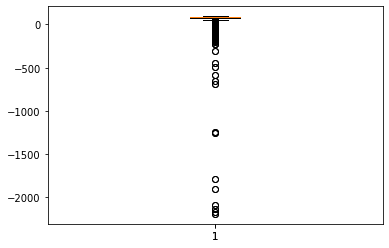

Posición de outliers en el extremo inferior:  [  9  23  29  38  72  96 110 114 115 117 125 149 161 167 168 169 172 177
 185 199 202 205 225 234 239 248 249 250 251 254 273 276 285 289 291 303
 316 321 322 323 324 325 336 346 350 353 354 366 368 371 382 390 394 403
 408 410 428]
Posición de outliers en el extremo superior:  []
[0. 1.] [385  57]
Número de instancias normales:  385
Número de instancias atípicas:  57


In [246]:
#Tratamiento de outliers y valores perdidos (si los hay)

outlier_method = EllipticEnvelope().fit(diabetes.data)
# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(diabetes.data)

Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 3*RIC #xmin
ls = Q3 + 3*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

import matplotlib.pyplot as plt
prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

mask_outliers = np.zeros(np.shape(scores_pred))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1

valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print(valores, ocurrencias)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

for i in range(len(pos_i[0])):
  diabetes.data = np.delete(diabetes.data,(i), axis = 0)
  diabetes.target = np.delete(diabetes.target,(i), axis = 0)

In [247]:
#Partición externa de datos
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)

Test:  clases: [ 44.  47.  51.  53.  55.  59.  63.  64.  69.  72.  74.  75.  77.  80.
  83.  85.  86.  90.  91.  96.  97. 101. 103. 104. 109. 111. 113. 115.
 127. 128. 132. 136. 141. 142. 144. 153. 164. 168. 172. 183. 185. 191.
 192. 196. 198. 200. 216. 217. 220. 221. 225. 230. 253. 257. 258. 259.
 261. 263. 268. 272. 274. 275. 276. 281. 288. 297. 317. 332.]  ocurrencias:  [1 1 1 1 1 3 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [248]:
#Estandarización de los datos
estandarizador = StandardScaler()
estandarizador.fit(X_train)
mu = estandarizador.mean_
sigma = np.sqrt(estandarizador.var_)
X_train = estandarizador.transform(X_train)

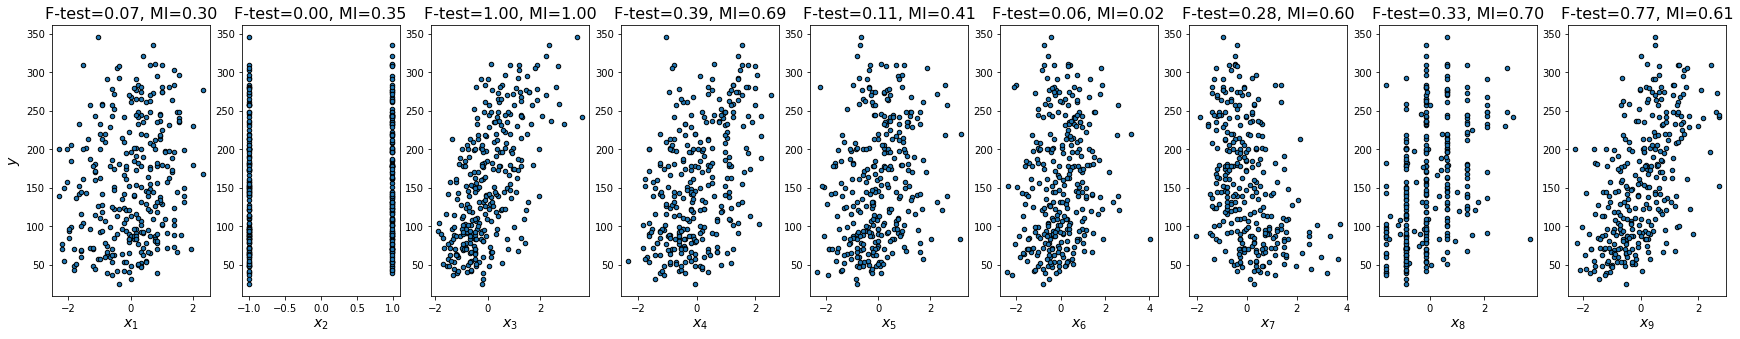

(308, 10)
(308, 9)


In [249]:
#Selección de atributos mediante métodos supervisados (solo uno)

f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train,y_train)
mi /= np.max(mi)

plt.figure(figsize=(30, 5))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.scatter(X_train[:, i], y_train, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

print(X_train.shape)

for i in range(len(f_test)):
  j=0
  if f_test[i] + mi[i] < 0.2:
    X_train = np.delete(X_train,(i-j), axis = 1)
    X_test = np.delete(X_test,(i-j), axis = 1)
    j+=1

print(X_train.shape)

In [250]:
#Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
valores_train, ocur_train = np.unique(y_train, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_train, '  ocurrencias:', ocur_train)

valores_val, ocur_val = np.unique(y_val, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_val, '  ocurrencias:', ocur_val)

Entrenamiento:   clases: [ 31.  37.  39.  40.  42.  45.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  58.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  77.
  78.  79.  81.  83.  84.  85.  87.  88.  89.  90.  91.  92.  93.  94.
  95.  96.  97.  99. 101. 102. 103. 104. 107. 109. 110. 111. 113. 114.
 115. 116. 118. 120. 121. 122. 123. 124. 125. 127. 128. 129. 131. 132.
 134. 137. 139. 140. 141. 142. 143. 144. 145. 146. 148. 150. 151. 152.
 154. 155. 156. 158. 161. 162. 163. 167. 170. 172. 173. 174. 175. 177.
 178. 179. 180. 181. 182. 185. 186. 189. 195. 196. 197. 198. 199. 200.
 201. 202. 206. 208. 209. 210. 212. 214. 215. 217. 219. 220. 222. 225.
 229. 230. 233. 235. 236. 237. 241. 242. 243. 244. 245. 246. 248. 249.
 252. 257. 258. 262. 264. 265. 270. 272. 273. 275. 277. 279. 280. 281.
 283. 292. 293. 295. 296. 303. 308. 310. 311. 321. 336. 346.]   ocurrencias: [1 1 1 1 1 1 1 1 2 1 1 1 3 1 2 1 3 2 1 2 2 1 1 1 3 4 1 2 2 1 2 2 4 2 1 2 2
 3 3 1 2 3 1 3 1 2 1 2 1 2 1 1 1 1 1 1 1 2

In [263]:
#Modelado
n_neighbors=4

algoritmos = {'OLS': LinearRegression(), 'KNN': KNeighborsClassifier(n_neighbors)}

results={}
for nombre, alg in algoritmos.items():
    results[nombre] = cross_val_score(alg, X_val, y_val, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    print(nombre + ':  Accuracy:  %0.4f +/- %0.4f'% (results[nombre].mean(), results[nombre].std()))


OLS:  Accuracy:  0.3057 +/- 0.3800
KNN:  Accuracy:  0.0154 +/- 0.0308


In [279]:
#Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
algoritmos = {'OLS': LinearRegression(), 'KNN': KNeighborsClassifier(n_neighbors)}

OLS_definitivo = OLS.fit(X_train, y_train)
ols_y_pred = OLS_definitivo.predict(X_test)
print(y_test)


# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, ols_y_pred))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, ols_y_pred))
#MAPE
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, ols_y_pred))
#RMSE
print("Mean squeared error: %.2f" % math.sqrt(mean_squared_error(y_test, ols_y_pred)))
# R2
print("Coefficient of determination: %.2f" % r2_score(y_test, ols_y_pred))

KNN_definitivo = KNN.fit(X_train, y_train)
knn_y_pred = KNN_definitivo.predict(X_test)
print(y_test)

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, knn_y_pred))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, knn_y_pred))
#MAPE
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, knn_y_pred))
#RMSE
print("Mean squeared error: %.2f" % math.sqrt(mean_squared_error(y_test, knn_y_pred)))
# R2
print("Coefficient of determination: %.2f" % r2_score(y_test, knn_y_pred))

[192. 172. 261.  51. 297. 183.  97.  74.  72.  85. 198. 127.  91. 109.
 220. 259.  77.  55. 111. 253. 141. 113. 168. 288.  59.  59. 196. 113.
  75. 221.  59. 225. 132. 272.  86.  69. 257.  96. 275. 109. 281.  47.
 101. 263.  72.  53. 128. 103. 128. 258. 144. 268. 168. 153. 185. 216.
 115. 274.  69.  90. 164.  44.  83. 191.  80. 230. 136.  64. 104.  63.
 276. 142. 217.  77. 200. 332. 317.]
Mean squared error: 6117.67
Mean absolute error: 68.85
Mean absolute percentage error: 0.62
Mean squeared error: 78.22
Coefficient of determination: 0.05
[192. 172. 261.  51. 297. 183.  97.  74.  72.  85. 198. 127.  91. 109.
 220. 259.  77.  55. 111. 253. 141. 113. 168. 288.  59.  59. 196. 113.
  75. 221.  59. 225. 132. 272.  86.  69. 257.  96. 275. 109. 281.  47.
 101. 263.  72.  53. 128. 103. 128. 258. 144. 268. 168. 153. 185. 216.
 115. 274.  69.  90. 164.  44.  83. 191.  80. 230. 136.  64. 104.  63.
 276. 142. 217.  77. 200. 332. 317.]
Mean squared error: 15296.38
Mean absolute error: 96.32
Mean a

Breve discusión comparando los resultados obtenidos con cada método.
Se ha podido comprobar como ninguno de los dos algoritmos nos ha ofrecido un gran rendimiento, aun asi se puede ver como el OLS ha dado mejores resultados que el KNN